In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

In [3]:
os.getcwd()

'F:\\My_Learning\\Python_4_DS\\Section6'

In [4]:
movies=pd.read_csv('Movie-Ratings.csv')

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
len(movies)

559

In [7]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [8]:
movies=movies.rename(columns={'Rotten Tomatoes Ratings %':'CriticsRatings','Audience Ratings %':'AudienceRatings','Budget (million $)':'BudgetMillion','Year of release':'Year'})
movies.head()

,Film,Genre,CriticsRatings,AudienceRatings,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null object
Genre              559 non-null object
CriticsRatings     559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillion      559 non-null int64
Year               559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [10]:
movies.describe()

,CriticsRatings,AudienceRatings,BudgetMillion,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


```Year is shown as integer need to convert more relevant data type```

In [11]:
# convert to  category type
movies.Film=movies.Film.astype('category')

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null object
CriticsRatings     559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillion      559 non-null int64
Year               559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [13]:
movies.Genre=movies.Genre.astype('category')
movies.Year=movies.Year.astype('category')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticsRatings     559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillion      559 non-null int64
Year               559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


**To know unique value in the category**

In [14]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [15]:
movies.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

#### Now year columns is not considered as integer hence we dont get details in decribe

In [16]:
movies.describe()

,CriticsRatings,AudienceRatings,BudgetMillion
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


**'All' will include non numeric fields as well since year no longer considered as numeric**

In [17]:
movies.describe(include='all')

,Film,Genre,CriticsRatings,AudienceRatings,BudgetMillion,Year
count,559,559,559.000000,559.000000,559.000000,559.0
unique,559,7,NaN,NaN,NaN,5.0
top,Zookeeper,Comedy,NaN,NaN,NaN,2011.0
freq,1,172,NaN,NaN,NaN,123.0
mean,NaN,NaN,47.309481,58.744186,50.236136,NaN
std,NaN,NaN,26.413091,16.826887,48.731817,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,25.000000,47.000000,20.000000,NaN
50%,NaN,NaN,46.000000,58.000000,35.000000,NaN
75%,NaN,NaN,70.000000,72.000000,65.000000,NaN


Signature:
sns.jointplot(x, y, data=None, kind='scatter', stat_func=<function pearsonr at 0x0FC81348>, color=None, size=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)

Docstring:
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
1. x, y : strings or vectors
    Data or names of variables in ``data``.
2. data : DataFrame, optional
    DataFrame when ``x`` and ``y`` are variable names.
3. kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, optional
    Kind of plot to draw.
4. stat_func : callable or None, optional
    Function used to calculate a statistic about the relationship and
    annotate the plot. Should map `x` and `y` either to a single value
    or to a (value, p) tuple. Set to ``None`` if you don't want to
    annotate the plot.
5. color : matplotlib color, optional
    Color used for the plot elements.
6. size : numeric, optional
    Size of the figure (it will be square).
7. ratio : numeric, optional
    Ratio of joint axes size to marginal axes height.
8. space : numeric, optional
    Space between the joint and marginal axes
9. dropna : bool, optional
    If True, remove observations that are missing from ``x`` and ``y``.
10.{x, y}lim : two-tuples, optional
    Axis limits to set before plotting.
11. {joint, marginal, annot}_kws : dicts, optional
    Additional keyword arguments for the plot components.
12. kwargs : key, value pairings
    Additional keyword arguments are passed to the function used to
    draw the plot on the joint Axes, superseding items in the
    ``joint_kws`` dictionary.

Returns
-------
grid : :class:`JointGrid`
    :class:`JointGrid` object with the plot on it.

See Also
--------
JointGrid : The Grid class used for drawing this plot. Use it directly if
            you need more flexibility.

Examples
--------

Draw a scatterplot with marginal histograms:

.. plot::
    :context: close-figs

    >>> import numpy as np, pandas as pd; np.random.seed(0)
    >>> import seaborn as sns; sns.set(style="white", color_codes=True)
    >>> tips = sns.load_dataset("tips")
    >>> g = sns.jointplot(x="total_bill", y="tip", data=tips)

Add regression and kernel density fits:

.. plot::
    :context: close-figs

    >>> g = sns.jointplot("total_bill", "tip", data=tips, kind="reg")

Replace the scatterplot with a joint histogram using hexagonal bins:

.. plot::
    :context: close-figs

    >>> g = sns.jointplot("total_bill", "tip", data=tips, kind="hex")

Replace the scatterplots and histograms with density estimates and align
the marginal Axes tightly with the joint Axes:

.. plot::
    :context: close-figs

    >>> iris = sns.load_dataset("iris")
    >>> g = sns.jointplot("sepal_width", "petal_length", data=iris,
    ...                   kind="kde", space=0, color="g")

Use a different statistic for the annotation:

.. plot::
    :context: close-figs

    >>> from scipy.stats import spearmanr
    >>> g = sns.jointplot("size", "total_bill", data=tips,
    ...                   stat_func=spearmanr, color="m")

Draw a scatterplot, then add a joint density estimate:

.. plot::
    :context: close-figs

    >>> g = (sns.jointplot("sepal_length", "sepal_width",
    ...                    data=iris, color="k")
    ...         .plot_joint(sns.kdeplot, zorder=0, n_levels=6))

Pass vectors in directly without using Pandas, then name the axes:

.. plot::
    :context: close-figs

    >>> x, y = np.random.randn(2, 300)
    >>> g = (sns.jointplot(x, y, kind="hex", stat_func=None)
    ...         .set_axis_labels("x", "y"))

Draw a smaller figure with more space devoted to the marginal plots:

.. plot::
    :context: close-figs

    >>> g = sns.jointplot("total_bill", "tip", data=tips,
    ...                   size=5, ratio=3, color="g")

Pass keyword arguments down to the underlying plots:

.. plot::
    :context: close-figs

    >>> g = sns.jointplot("petal_length", "sepal_length", data=iris,
    ...                   marginal_kws=dict(bins=15, rug=True),
    ...                   annot_kws=dict(stat="r"),
    ...                   s=40, edgecolor="w", linewidth=1)
File:      c:\python36\lib\site-packages\seaborn\axisgrid.py
Type:      function

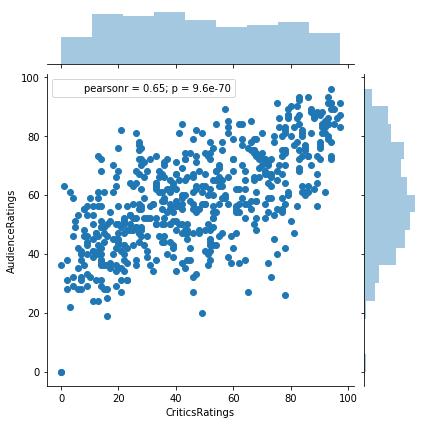

In [18]:
joinPlot=sns.jointplot(data=movies, x='CriticsRatings',y='AudienceRatings')

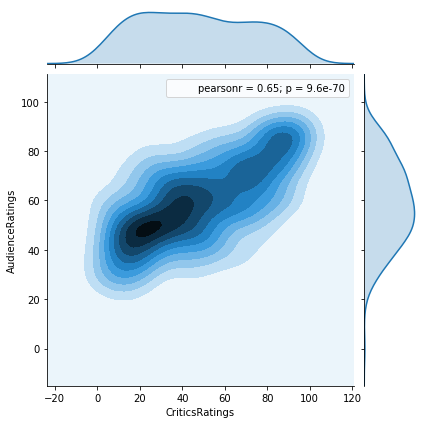

In [19]:
joinPlot1=sns.jointplot(data=movies, x='CriticsRatings',y='AudienceRatings',kind='kde')

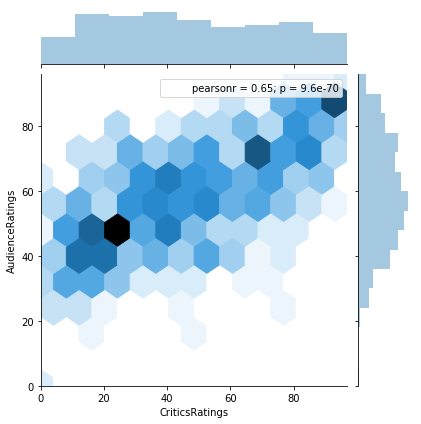

In [20]:
joinPlot1=sns.jointplot(data=movies, x='CriticsRatings',y='AudienceRatings',kind='hex')

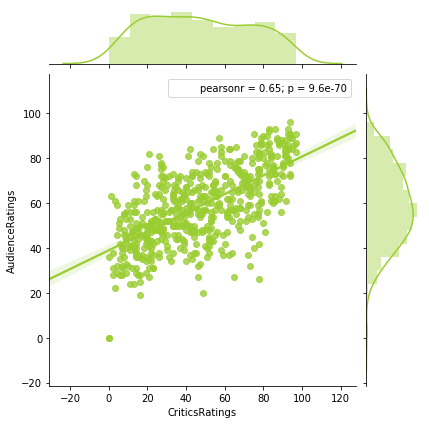

In [21]:
joinPlot2=sns.jointplot(data=movies, x='CriticsRatings',y='AudienceRatings',kind='reg',color='#9ACD32')

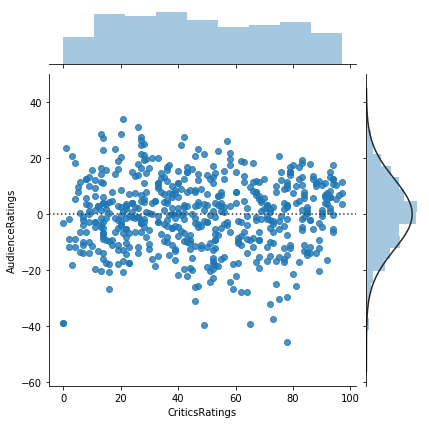

In [22]:
joinPlot2=sns.jointplot(data=movies, x='CriticsRatings',y='AudienceRatings',kind='resid')

In [23]:
movies.corr()

,CriticsRatings,AudienceRatings,BudgetMillion
CriticsRatings,1.000000,0.654803,0.014071
AudienceRatings,0.654803,1.000000,0.191108
BudgetMillion,0.014071,0.191108,1.000000


---

### Histogram

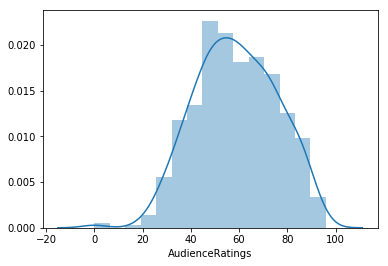

In [24]:
m1=sns.distplot(movies.AudienceRatings, bins=15)

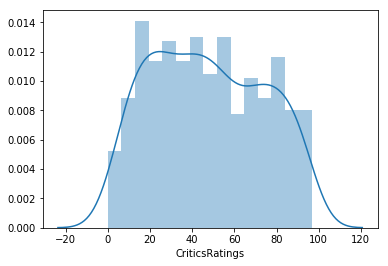

In [25]:
m2=sns.distplot(movies.CriticsRatings, bins=15)

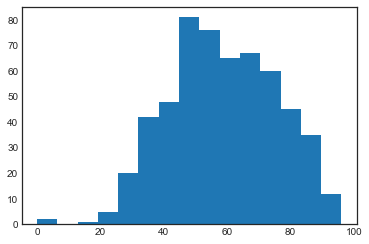

In [26]:
sns.set_style("white")
m3=plt.hist(movies.AudienceRatings,bins=15)

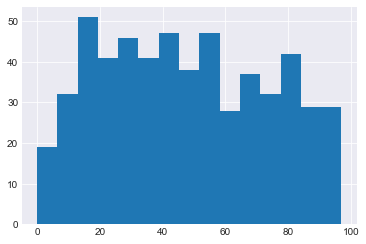

In [27]:
sns.set_style("darkgrid")
m3=plt.hist(movies.CriticsRatings,bins=15)

#### Stacked histogram

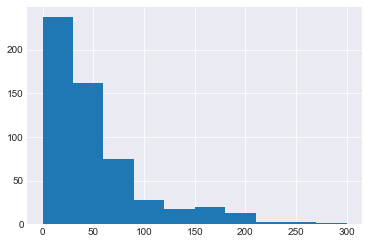

In [28]:
plt.hist(movies.BudgetMillion)
plt.show();

In [29]:
movies.Genre.cat.categories.unique

<bound method Index.unique of Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')>

In [30]:
movies[movies.Genre=='Drama'].head()

,Film,Genre,CriticsRatings,AudienceRatings,BudgetMillion,Year
10,88 Minutes,Drama,5,51,30,2007
11,A Dangerous Method,Drama,79,89,20,2011
13,A Serious Man,Drama,89,64,7,2009
18,Albert Nobbs,Drama,53,43,8,2011
23,All Good Things,Drama,33,64,20,2010


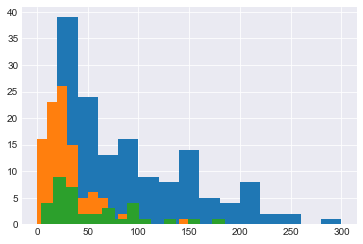

In [31]:
plt.hist(movies[movies.Genre=='Action'].BudgetMillion, bins=15)
plt.hist(movies[movies.Genre=='Drama'].BudgetMillion, bins=15)
plt.hist(movies[movies.Genre=='Thriller'].BudgetMillion, bins=15)
plt.show();

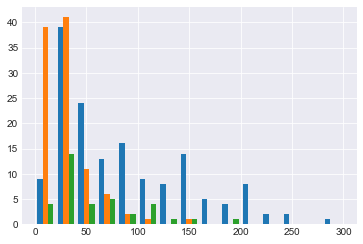

In [32]:
plt.hist([movies[movies.Genre=='Action'].BudgetMillion, movies[movies.Genre=='Drama'].BudgetMillion, movies[movies.Genre=='Thriller'].BudgetMillion], bins=15)
plt.show()

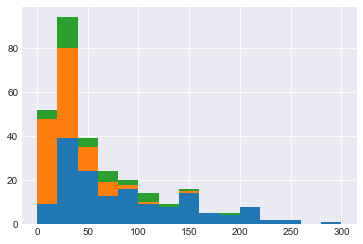

In [33]:
plt.hist([movies[movies.Genre=='Action'].BudgetMillion, 
          movies[movies.Genre=='Drama'].BudgetMillion,
          movies[movies.Genre=='Thriller'].BudgetMillion], bins=15, stacked=True)
plt.show()

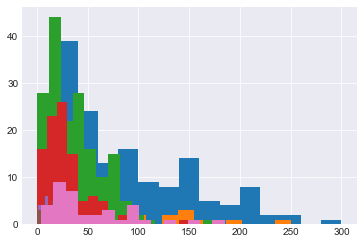

In [34]:
for i in movies.Genre.cat.categories:
    plt.hist(movies[movies.Genre==i].BudgetMillion, bins=15, stacked=True)
plt.show();   

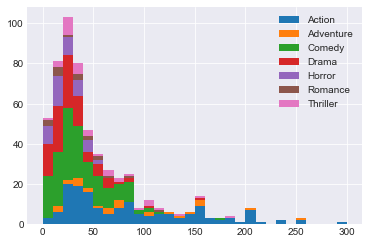

In [35]:
genre=[]
legend=[]
for i in movies.Genre.cat.categories:
    genre.append(movies[movies.Genre==i].BudgetMillion)
    legend.append(i)
plt.hist(genre, bins=30, stacked=True,rwidth=1, label=legend)
plt.legend()
plt.show()

#### KDE(Kernal Density Estimate) plot

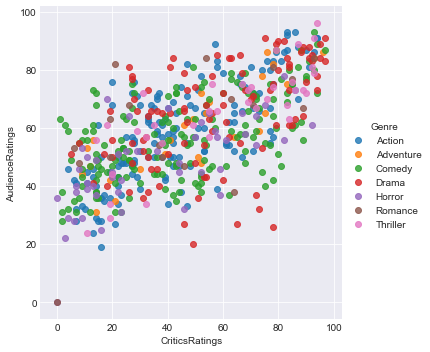

In [36]:
sns.lmplot(data=movies, x='CriticsRatings',y='AudienceRatings',fit_reg=False,hue='Genre',size=5,aspect=1);

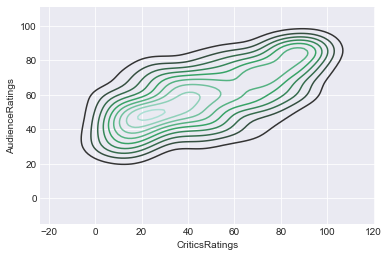

In [37]:
sns.kdeplot(movies.CriticsRatings,movies.AudienceRatings)

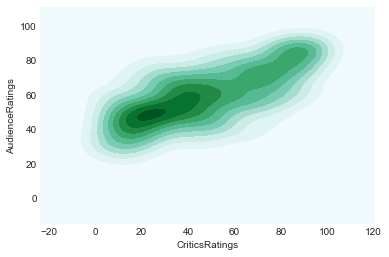

In [38]:
sns.kdeplot(movies.CriticsRatings,movies.AudienceRatings,shade=True)

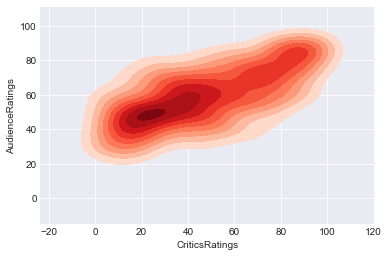

In [39]:
sns.kdeplot(movies.CriticsRatings,movies.AudienceRatings,shade=True,shade_lowest=False,cmap='Reds')

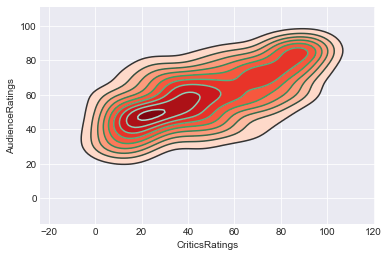

In [40]:
k2=sns.kdeplot(movies.CriticsRatings,movies.AudienceRatings,shade=True,shade_lowest=False,cmap='Reds')
k1=sns.kdeplot(movies.CriticsRatings,movies.AudienceRatings)

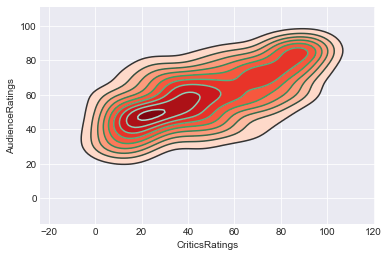

In [41]:
k2=sns.kdeplot(movies.CriticsRatings,movies.AudienceRatings,shade=True,shade_lowest=False,cmap='Reds',kernel='cos')
k1=sns.kdeplot(movies.CriticsRatings,movies.AudienceRatings)

In [42]:
movies.head()

,Film,Genre,CriticsRatings,AudienceRatings,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


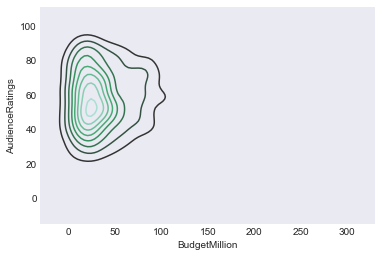

In [43]:
sns.set_style('dark')
sns.kdeplot(movies.BudgetMillion,movies.AudienceRatings);

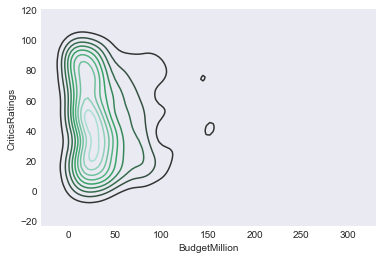

In [44]:
sns.kdeplot(movies.BudgetMillion,movies.CriticsRatings)

#### Subplots

[(-20, 160)]

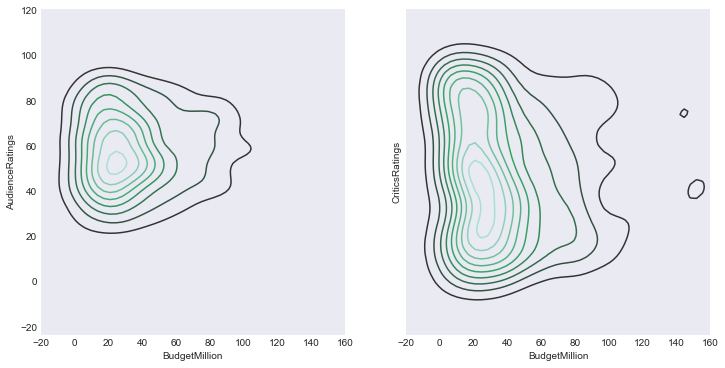

In [45]:
f, axes =plt.subplots(1,2, figsize=(12,6),sharex=True,sharey=True)
k1=sns.kdeplot(movies.BudgetMillion,movies.AudienceRatings,ax=axes[0]);
k2=sns.kdeplot(movies.BudgetMillion,movies.CriticsRatings,ax=axes[1]);
k1.set(xlim=(-20,160))

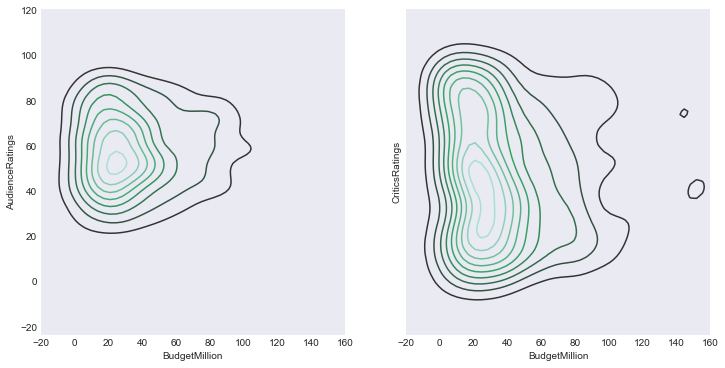

In [46]:
f

In [47]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000267FBA33EB8>,
      dtype=object)

### Violon plots and box plot

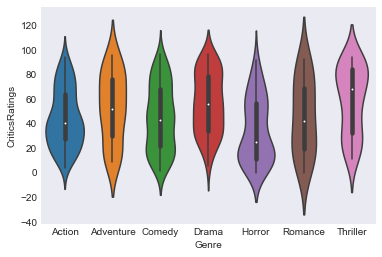

In [48]:
vp1=sns.violinplot(data=movies,x='Genre',y='CriticsRatings')

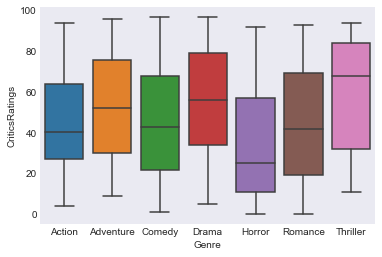

In [49]:
bp1=sns.boxplot(data=movies,x='Genre',y='CriticsRatings')

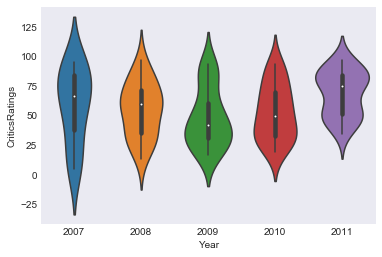

In [50]:
vp1=sns.violinplot(data=movies[movies.Genre=='Drama'],x='Year',y='CriticsRatings')

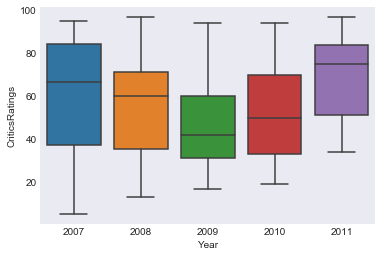

In [51]:
vp1=sns.boxplot(data=movies[movies.Genre=='Drama'],x='Year',y='CriticsRatings')

### Creating Facet grid

rows different genre

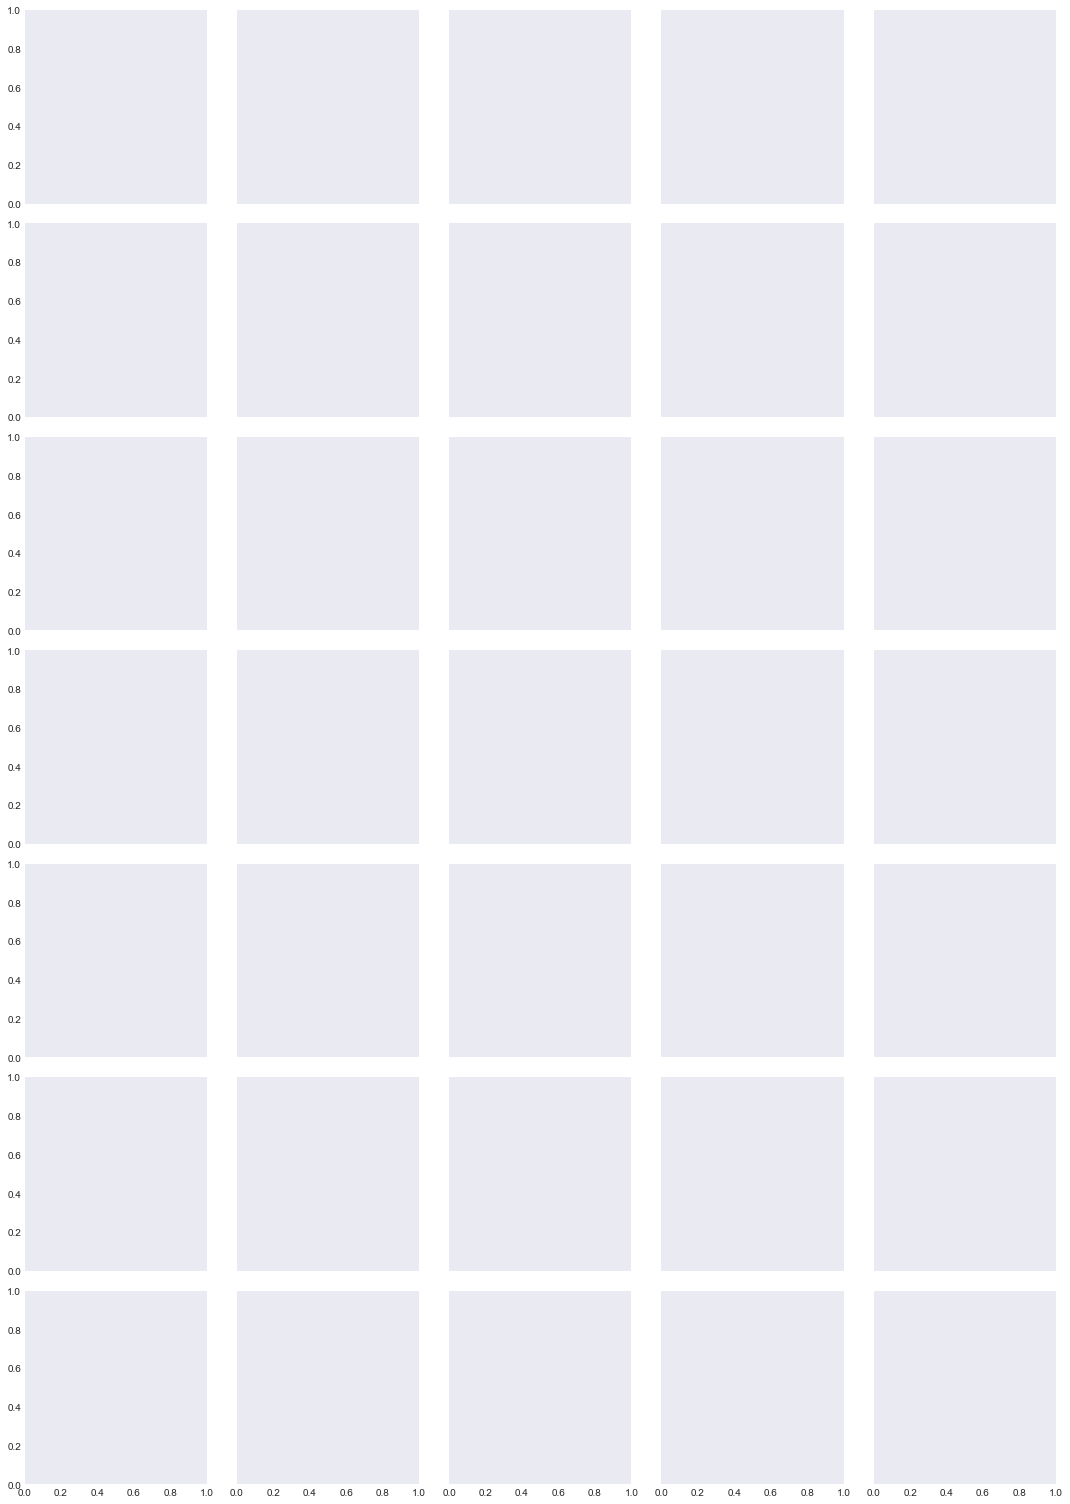

In [53]:
FG1=sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')